## Machine learnig - Prevendo preço das ações com Python

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (18,8)

In [2]:
data_inico = '2018-01-01'
data_fim = '2021-01-01'
df = data.DataReader('itub3.sa', 'yahoo', data_inico, data_fim)

In [3]:
#criando novos campos de medias móveis
df['mm7'] = df['Adj Close'].rolling(7).mean()
df['mm21d'] = df['Adj Close'].rolling(21).mean()

In [4]:
# vou colar um dia pra frente  o df pq se naão eu vou ver o valor da previção já dado,
#ou seja vou rodar o modelo já sabendo o valor kkkk
df['Adj Close'] = df['Adj Close'].shift(-1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d
Date,,,,,,,,
2018-01-02,25.653334,25.160000,25.306665,25.653334,513450.0,21.890501,NaN,NaN
2018-01-03,25.853333,25.400000,25.653334,25.853333,413700.0,22.133238,NaN,NaN
2018-01-04,26.266666,25.799999,25.853333,26.139999,340200.0,22.285641,NaN,NaN
2018-01-05,26.326666,25.926666,26.139999,26.320000,250050.0,22.161457,NaN,NaN
2018-01-08,26.226665,25.966665,26.073334,26.173332,238200.0,21.845343,NaN,NaN


In [5]:
# vamos apagar os dados nulos pq o modelo não vai ler essas infos NaN
df.dropna(inplace=True)
df

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d
Date,,,,,,,,
2018-01-30,29.480000,28.906666,29.480000,29.273333,304350.0,25.029013,24.192773,22.877000
2018-01-31,30.000000,29.353333,29.353333,29.559999,252900.0,25.206881,24.470176,23.034517
2018-02-01,29.866667,29.260000,29.600000,29.760000,328950.0,25.071363,24.787503,23.192440
2018-02-02,29.733334,29.200001,29.420000,29.600000,522450.0,24.534922,24.917739,23.332351
2018-02-05,29.666666,28.926666,29.559999,28.966665,209700.0,24.986660,24.971340,23.439459
...,...,...,...,...,...,...,...,...
2020-12-21,27.830000,27.230000,27.690001,27.410000,345500.0,27.236879,27.366672,26.618672
2020-12-22,27.840000,27.490000,27.490000,27.580000,363200.0,27.651653,27.352565,26.694142
2020-12-23,28.090000,27.629999,27.629999,28.000000,598700.0,28.076303,27.459785,26.762166


In [6]:
#verificando quantidade de linhas
qtd_linhas = len(df)

qtd_linhas_treino= round(.50 * qtd_linhas)
qtd_linhas_teste= 300 
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:359 linhas teste= 359:658 linhas validação= 717'

In [7]:
df["data_pregao"] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d,data_pregao
Date,,,,,,,,,
2018-01-30,29.480000,28.906666,29.480000,29.273333,304350.0,25.029013,24.192773,22.877000,2018-01-30
2018-01-31,30.000000,29.353333,29.353333,29.559999,252900.0,25.206881,24.470176,23.034517,2018-01-31
2018-02-01,29.866667,29.260000,29.600000,29.760000,328950.0,25.071363,24.787503,23.192440,2018-02-01
2018-02-02,29.733334,29.200001,29.420000,29.600000,522450.0,24.534922,24.917739,23.332351,2018-02-02
2018-02-05,29.666666,28.926666,29.559999,28.966665,209700.0,24.986660,24.971340,23.439459,2018-02-05
...,...,...,...,...,...,...,...,...,...
2020-12-21,27.830000,27.230000,27.690001,27.410000,345500.0,27.236879,27.366672,26.618672,2020-12-21
2020-12-22,27.840000,27.490000,27.490000,27.580000,363200.0,27.651653,27.352565,26.694142,2020-12-22
2020-12-23,28.090000,27.629999,27.629999,28.000000,598700.0,28.076303,27.459785,26.762166,2020-12-23


In [8]:
#reindexando o data frame
df = df.reset_index(drop=True)
df

,High,Low,Open,Close,Volume,Adj Close,mm7,mm21d,data_pregao
0,29.480000,28.906666,29.480000,29.273333,304350.0,25.029013,24.192773,22.877000,2018-01-30
1,30.000000,29.353333,29.353333,29.559999,252900.0,25.206881,24.470176,23.034517,2018-01-31
2,29.866667,29.260000,29.600000,29.760000,328950.0,25.071363,24.787503,23.192440,2018-02-01
3,29.733334,29.200001,29.420000,29.600000,522450.0,24.534922,24.917739,23.332351,2018-02-02
4,29.666666,28.926666,29.559999,28.966665,209700.0,24.986660,24.971340,23.439459,2018-02-05
...,...,...,...,...,...,...,...,...,...
713,27.830000,27.230000,27.690001,27.410000,345500.0,27.236879,27.366672,26.618672,2020-12-21
714,27.840000,27.490000,27.490000,27.580000,363200.0,27.651653,27.352565,26.694142,2020-12-22
715,28.090000,27.629999,27.629999,28.000000,598700.0,28.076303,27.459785,26.762166,2020-12-23
716,28.480000,28.110001,28.170000,28.430000,775800.0,27.967672,27.600866,26.863072,2020-12-28


In [9]:
df_completo = df

In [10]:
#separando as features e labels
features = df.drop(['Close', 'Adj Close', 'data_pregao'], 1)
labels = df['Adj Close']

In [11]:
#Agora vamos escolher as melhores variaveis para da nossa base de dados com Kbest

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
##################################################################################

features_list = ('Open','High','Low','Volume','mm7','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'High': 50.85900695638343, 'Low': 37.68202428918366, 'mm21d': 32.2316660502221, 'Volume': 27.882436646226576, 'mm7': 11.943492237454418}


In [12]:

#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

359 359
299 299


In [13]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [14]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:95.15'

In [15]:
valor_novo = features.tail(58)
valor_novo

,High,Low,Open,Volume,mm7,mm21d
660,22.070000,21.299999,21.389999,598600.0,21.227953,21.862437
661,21.709999,21.250000,21.570000,434700.0,21.193555,21.778858
662,22.040001,21.490000,21.770000,391400.0,21.156342,21.673736
663,21.670000,21.330000,21.629999,354900.0,21.110692,21.589685
664,22.719999,21.370001,21.420000,1132100.0,21.278678,21.562329
665,23.020000,22.180000,22.510000,799100.0,21.428394,21.549486
666,23.030001,22.200001,22.490000,531600.0,21.553509,21.547880
667,22.500000,22.170000,22.420000,631900.0,21.649103,21.524729
668,22.230000,21.840000,22.150000,286000.0,21.716580,21.505786
669,22.110001,21.690001,22.100000,434800.0,21.743290,21.477467


In [16]:
#executando a previsão
previsao=scaler.transform(valor_novo)
pred=lr.predict(previsao)

pred

array([20.91108455, 20.46849986, 20.60439224, 20.38388322, 21.40514232,
       21.16743761, 21.30674981, 21.11399921, 21.061098  , 20.97296953,
       21.37425497, 21.69441586, 21.61710598, 22.26512832, 22.07097789,
       22.29132411, 21.92968163, 21.67557789, 21.90628662, 21.53548728,
       21.75747835, 21.72090753, 22.29569812, 22.14694332, 23.57691473,
       23.84072075, 23.67382689, 23.75769953, 24.7331578 , 25.17870527,
       25.1028034 , 25.09372092, 25.45470436, 25.34380303, 25.93885249,
       25.251773  , 25.07969088, 25.52527856, 25.10845572, 25.82948292,
       25.45555185, 25.80171585, 25.59696545, 26.13048778, 25.90152154,
       25.99254156, 26.68375537, 26.2385174 , 26.26537339, 26.72077941,
       26.90553714, 27.10444937, 27.08883229, 26.71871498, 27.04783777,
       27.23913739, 27.36597279, 27.2160451 ])

In [17]:
data_pregao_full=df_completo['data_pregao']
data_pregao=data_pregao_full.tail(58)

res_full=df_completo['Adj Close']
res=res_full.tail(58)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

df.head()

,real,previsao
data_pregao,,
2020-10-02,21.225960,20.911085
2020-10-05,21.157078,20.468500
2020-10-06,21.088194,20.604392
2020-10-07,22.150969,20.383883
2020-10-08,22.072243,21.405142


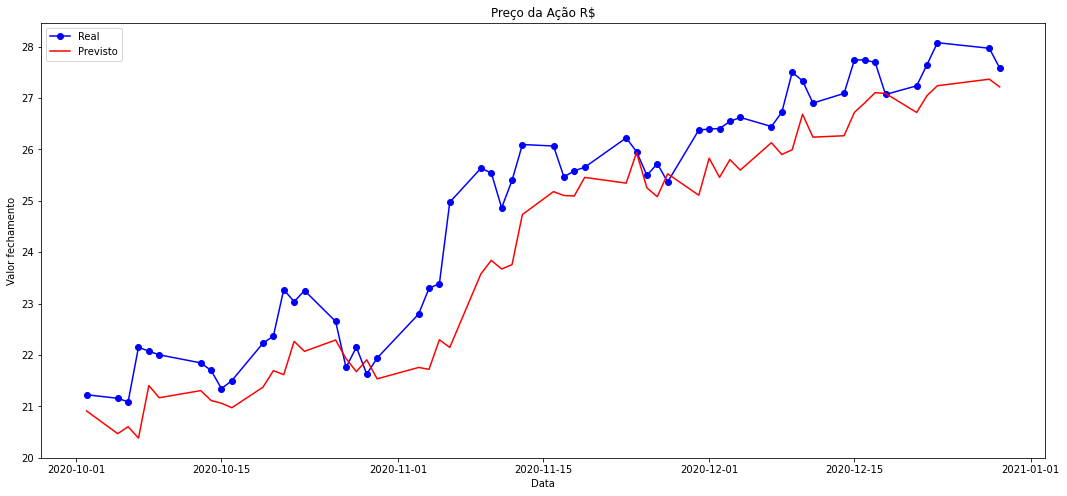

In [18]:
#plotagem
plt.title("Preço da Ação R$")
plt.plot(df["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

In [20]:
for index, row in df.iterrows():
    df.loc[index,'diferenca'] = (df.loc[index,'real'] - df.loc[index,'previsao']);

In [21]:
df.head()

,real,previsao,diferenca
data_pregao,,,
2020-10-02,21.225960,20.911085,0.314875
2020-10-05,21.157078,20.468500,0.688578
2020-10-06,21.088194,20.604392,0.483802
2020-10-07,22.150969,20.383883,1.767085
2020-10-08,22.072243,21.405142,0.667100
